# **LOADING DATASET, LIBRARIES**

In [155]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

In [156]:
cars_dset = pd.read_csv('autovit_final_dataset (7).csv')

In [157]:
cars_dset

,link,marca_model,marca,model,pret,an,km,combustibil,cutie,caroserie,capacitate_cc,putere_cp
0,https://www.autovit.ro/autoturisme/anunt/renau...,Renault Megane Blue dCi 116 EDC Zen,Renault,Megane Blue dCi 116 EDC Zen,15 990 EUR,2025,95960.0,Diesel,Automata,Compacta,14613.0,116.0
1,https://www.autovit.ro/autoturisme/anunt/merce...,Mercedes-Benz CLA 180 7G-DCT AMG Line Advanced...,Mercedes-Benz,CLA 180 7G-DCT AMG Line Advanced Plus,"27 491,20 EUR",2025,160000.0,Benzina,Automata,Sedan,13323.0,136.0
2,https://www.autovit.ro/autoturisme/anunt/opel-...,Opel Crossland 1.2 Automatik Ultimate,Opel,Crossland 1.2 Automatik Ultimate,13 990 EUR,2023,64000.0,Benzina,Automata,SUV,11993.0,130.0
3,https://www.autovit.ro/autoturisme/anunt/bmw-s...,BMW Seria 5,BMW,Seria 5,5 900 EUR,2025,330000.0,Diesel,Automata,Sedan,19953.0,177.0
4,https://www.autovit.ro/autoturisme/anunt/merce...,Mercedes-Benz GLE,Mercedes-Benz,GLE,84 216 EUR,2025,38636.0,Hibrid Plug-In,Automata,SUV,19933.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6029,https://www.autovit.ro/autoturisme/anunt/ford-...,Ford Focus,Ford,Focus,6 750 EUR,2025,176000.0,Benzina,Manuala,Combi,14993.0,150.0
6030,https://www.autovit.ro/autoturisme/anunt/ssang...,SsangYong Korando 1.5 GDI Turbo AT Premium,SsangYong,Korando 1.5 GDI Turbo AT Premium,28 072 EUR,2025,850.0,Benzina,Automata,SUV,14973.0,163.0
6031,https://www.autovit.ro/autoturisme/anunt/merce...,Mercedes-Benz EQA 250+,Mercedes-Benz,EQA 250+,"50 809,11 EUR",2025,1.0,Electric,Automata,SUV,NaN,NaN
6032,https://www.autovit.ro/autoturisme/anunt/volks...,Volkswagen Passat,Volkswagen,Passat,12 350 EUR,2025,220000.0,Diesel,Automata,Combi,19683.0,190.0


# **SHOWCASING THE DISTRIBUTION OF THE CARS BASED ON THE "MARCA" FEATURE AND GETTING RID OF THE REDUNDANT FEATURES**

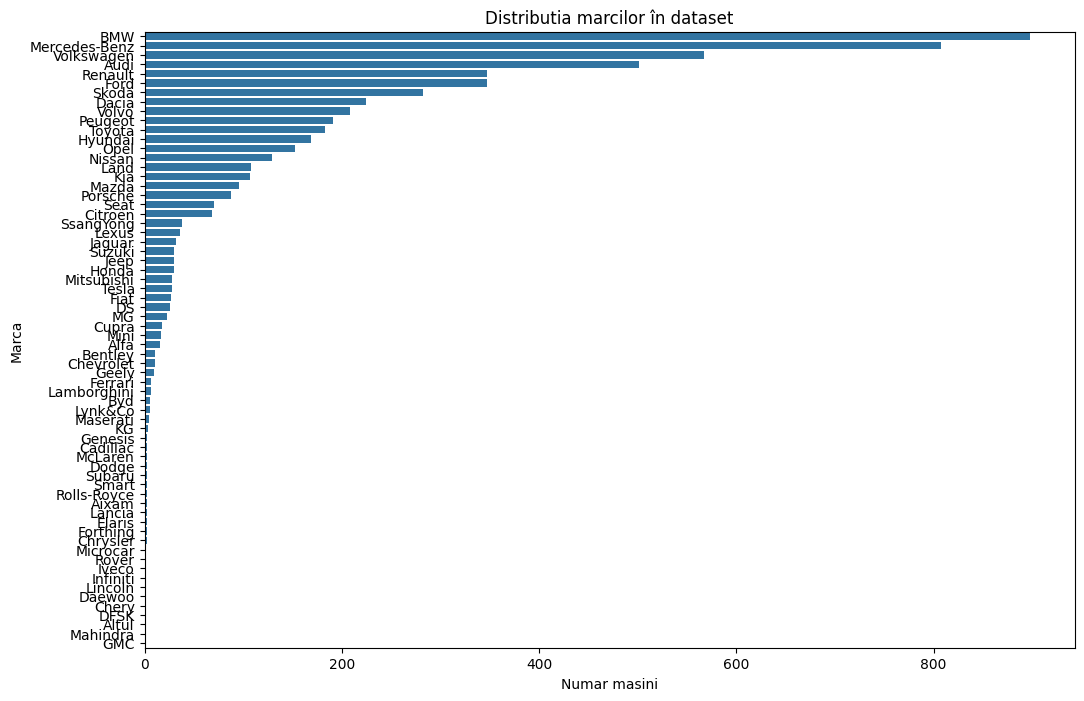

In [158]:
plt.figure(figsize=(12, 8))
sns.countplot(y=cars_dset['marca'], order=cars_dset['marca'].value_counts().index)
plt.title("Distributia marcilor în dataset")
plt.xlabel("Numar masini")
plt.ylabel("Marca")
plt.show()

In [159]:
print(len(cars_dset))

6034


In [160]:
cars_dset.drop_duplicates(inplace=True)

In [161]:
print(len(cars_dset))

6034


In [162]:
cars_dset = cars_dset.drop(labels=['link', 'marca_model'], axis=1)

I have kept the 'model' feature, but decided to keep only the relevant details, such as strictly the name of the model itself

In [163]:
for i in range(len(cars_dset['model'])):
  new_model = cars_dset['model'][i].split()[0]
  cars_dset.loc[i, 'model'] = new_model

In [164]:
cars_dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6034 entries, 0 to 6033
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   marca          6034 non-null   object 
 1   model          6034 non-null   object 
 2   pret           6034 non-null   object 
 3   an             6034 non-null   int64  
 4   km             6025 non-null   float64
 5   combustibil    6034 non-null   object 
 6   cutie          6032 non-null   object 
 7   caroserie      6034 non-null   object 
 8   capacitate_cc  5870 non-null   float64
 9   putere_cp      6030 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 471.5+ KB


In [165]:
cars_dset

,marca,model,pret,an,km,combustibil,cutie,caroserie,capacitate_cc,putere_cp
0,Renault,Megane,15 990 EUR,2025,95960.0,Diesel,Automata,Compacta,14613.0,116.0
1,Mercedes-Benz,CLA,"27 491,20 EUR",2025,160000.0,Benzina,Automata,Sedan,13323.0,136.0
2,Opel,Crossland,13 990 EUR,2023,64000.0,Benzina,Automata,SUV,11993.0,130.0
3,BMW,Seria,5 900 EUR,2025,330000.0,Diesel,Automata,Sedan,19953.0,177.0
4,Mercedes-Benz,GLE,84 216 EUR,2025,38636.0,Hibrid Plug-In,Automata,SUV,19933.0,320.0
...,...,...,...,...,...,...,...,...,...,...
6029,Ford,Focus,6 750 EUR,2025,176000.0,Benzina,Manuala,Combi,14993.0,150.0
6030,SsangYong,Korando,28 072 EUR,2025,850.0,Benzina,Automata,SUV,14973.0,163.0
6031,Mercedes-Benz,EQA,"50 809,11 EUR",2025,1.0,Electric,Automata,SUV,NaN,NaN
6032,Volkswagen,Passat,12 350 EUR,2025,220000.0,Diesel,Automata,Combi,19683.0,190.0


In [166]:
len(cars_dset)

6034

# **FILLING THE NAN VALUES WITH AVERAGE AND MODE**

I have filled the NaN values using mean for the numerical features and mode for the categorical features

In [167]:
numeric_columns = cars_dset.select_dtypes(include=['int64', 'float64']).columns
print(numeric_columns)
categorical_columns = cars_dset.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['an', 'km', 'capacitate_cc', 'putere_cp'], dtype='object')
Index(['marca', 'model', 'pret', 'combustibil', 'cutie', 'caroserie'], dtype='object')


In [168]:
for column in numeric_columns:
  avg_col = cars_dset[column].mean()
  cars_dset[column] = cars_dset[column].fillna(avg_col)

for column in categorical_columns:
  cars_dset[column] = cars_dset[column].fillna(cars_dset[column].mode()[0])

In [169]:
cars_dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6034 entries, 0 to 6033
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   marca          6034 non-null   object 
 1   model          6034 non-null   object 
 2   pret           6034 non-null   object 
 3   an             6034 non-null   int64  
 4   km             6034 non-null   float64
 5   combustibil    6034 non-null   object 
 6   cutie          6034 non-null   object 
 7   caroserie      6034 non-null   object 
 8   capacitate_cc  6034 non-null   float64
 9   putere_cp      6034 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 471.5+ KB


I have cleaned the price feature so that only the numerical value is being kept, and then converted to float

In [170]:
def clean_price(text):
    text = re.sub(r'[^0-9]', '', text)
    return text

In [171]:
cars_dset['pret'] = cars_dset['pret'].apply(clean_price)
cars_dset['pret'] = [float(price) for price in cars_dset['pret']]

In [172]:
cars_dset.head()

,marca,model,pret,an,km,combustibil,cutie,caroserie,capacitate_cc,putere_cp
0,Renault,Megane,15990.0,2025,95960.0,Diesel,Automata,Compacta,14613.0,116.0
1,Mercedes-Benz,CLA,2749120.0,2025,160000.0,Benzina,Automata,Sedan,13323.0,136.0
2,Opel,Crossland,13990.0,2023,64000.0,Benzina,Automata,SUV,11993.0,130.0
3,BMW,Seria,5900.0,2025,330000.0,Diesel,Automata,Sedan,19953.0,177.0
4,Mercedes-Benz,GLE,84216.0,2025,38636.0,Hibrid Plug-In,Automata,SUV,19933.0,320.0


I have kept only the classes from the 'marca' feature that have atleast 200 samples. The reason being that I intend to to a classification on task on this dataset and I want as many samples as possible for each class for my models to be able to learn about the class itself.

In [173]:
proportions = cars_dset['marca'].value_counts()
valid_brands = proportions[proportions > 200].index
cars_dset = cars_dset[cars_dset['marca'].isin(valid_brands)]
print(len(cars_dset))

4183


In [174]:
cars_dset

,marca,model,pret,an,km,combustibil,cutie,caroserie,capacitate_cc,putere_cp
0,Renault,Megane,15990.0,2025,95960.0,Diesel,Automata,Compacta,14613.00000,116.000000
1,Mercedes-Benz,CLA,2749120.0,2025,160000.0,Benzina,Automata,Sedan,13323.00000,136.000000
3,BMW,Seria,5900.0,2025,330000.0,Diesel,Automata,Sedan,19953.00000,177.000000
4,Mercedes-Benz,GLE,84216.0,2025,38636.0,Hibrid Plug-In,Automata,SUV,19933.00000,320.000000
6,BMW,X4,3499925.0,2025,108589.0,Benzina,Automata,SUV,29983.00000,354.000000
...,...,...,...,...,...,...,...,...,...,...
6028,Volkswagen,Golf,21490.0,2022,80000.0,Hibrid Plug-In,Automata,Compacta,13953.00000,245.000000
6029,Ford,Focus,6750.0,2025,176000.0,Benzina,Manuala,Combi,14993.00000,150.000000
6031,Mercedes-Benz,EQA,5080911.0,2025,1.0,Electric,Automata,SUV,19816.28109,192.959867
6032,Volkswagen,Passat,12350.0,2025,220000.0,Diesel,Automata,Combi,19683.00000,190.000000


In [175]:
print(len(cars_dset))

4183


In [176]:
cars_dset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4183 entries, 0 to 6033
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   marca          4183 non-null   object 
 1   model          4183 non-null   object 
 2   pret           4183 non-null   float64
 3   an             4183 non-null   int64  
 4   km             4183 non-null   float64
 5   combustibil    4183 non-null   object 
 6   cutie          4183 non-null   object 
 7   caroserie      4183 non-null   object 
 8   capacitate_cc  4183 non-null   float64
 9   putere_cp      4183 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 359.5+ KB


# **CLEARING OUT THE OUTLIERS, FEATURE ENGINEERING AND NORMALISING THE DATA USING MIN MAX SCALER**

I have cleared the outliers for each numerical feature

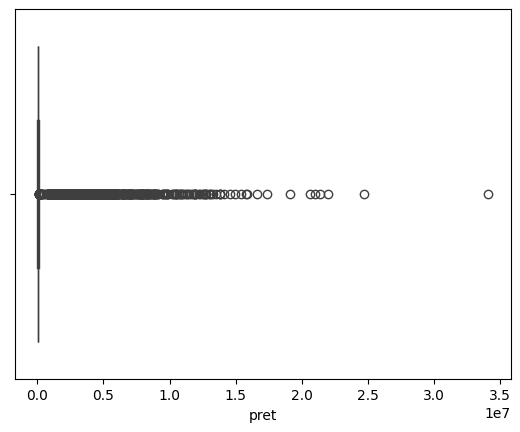

In [177]:
sns.boxplot(x=cars_dset['pret'])
plt.show()

In [178]:
cars_dset['pret'].describe()

,pret
count,4.183000e+03
mean,9.053375e+05
std,2.325488e+06
min,2.000000e+00
25%,1.099900e+04
50%,2.045000e+04
75%,5.747500e+04
max,3.412430e+07


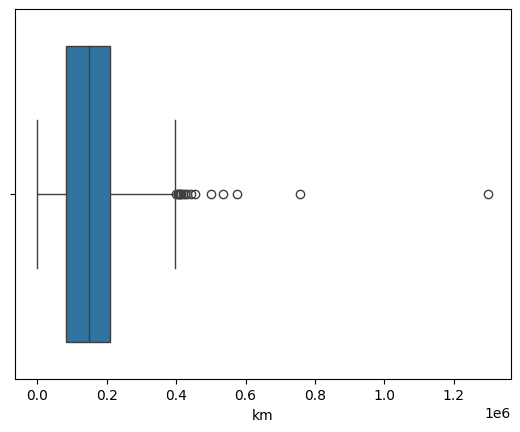

In [179]:
sns.boxplot(x=cars_dset['km'])
plt.show()

In [180]:
cars_dset['km'].describe()

,km
count,4.183000e+03
mean,1.474891e+05
std,8.802417e+04
min,1.000000e+00
25%,8.184950e+04
50%,1.499990e+05
75%,2.081800e+05
max,1.300000e+06


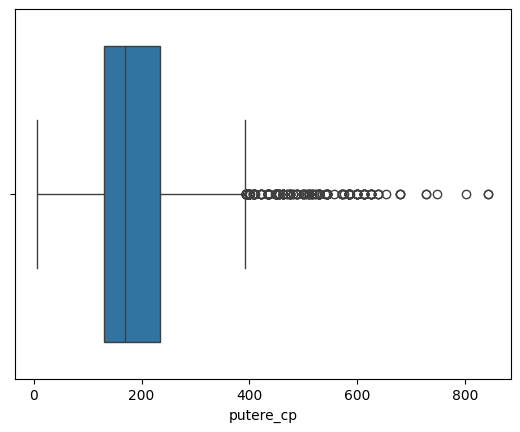

In [181]:
sns.boxplot(x=cars_dset['putere_cp'])
plt.show()

In [182]:
cars_dset['putere_cp'].describe()

,putere_cp
count,4183.000000
mean,197.178800
std,103.279559
min,7.000000
25%,130.000000
50%,170.000000
75%,235.000000
max,843.000000


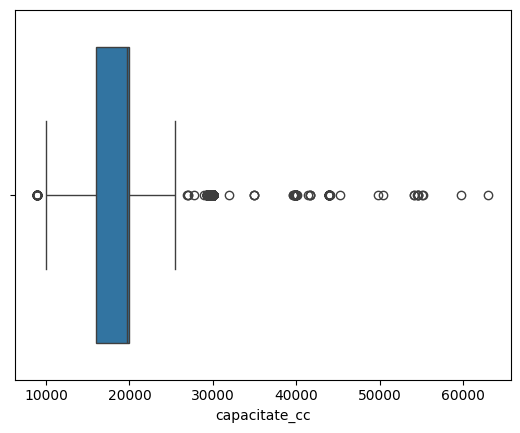

In [183]:
sns.boxplot(x=cars_dset['capacitate_cc'])
plt.show()

In [184]:
cars_dset['capacitate_cc'].describe()

,capacitate_cc
count,4183.000000
mean,20110.868826
std,6514.186955
min,8983.000000
25%,15963.000000
50%,19693.000000
75%,19983.000000
max,62993.000000


In [185]:
for col in ["pret", "km", "putere_cp", "capacitate_cc"]:
  q_low = cars_dset[col].quantile(0.25)
  q_high = cars_dset[col].quantile(0.75)
  IQR = q_high - q_low

  lower_bound = q_low - 1.5 * IQR
  upper_bound = q_high + 1.5 * IQR


  cars_dset = cars_dset[(cars_dset[col] >= lower_bound) & (cars_dset[col] <= upper_bound)]

I have done a little bit of feature engineering to help the future models in the classification task

In [186]:
cars_dset.loc[:, 'pret_per_cp'] = cars_dset['pret'] / (cars_dset['putere_cp'] + 1)
cars_dset.loc[:, 'pret_per_cc'] = cars_dset['pret'] / (cars_dset['capacitate_cc'] + 1)
cars_dset.loc[:, 'km_per_year'] = cars_dset['km'] / ((2025 - cars_dset['an']).clip(0, 50) + 1)

In [187]:
cars_dset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2728 entries, 0 to 6033
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   marca          2728 non-null   object 
 1   model          2728 non-null   object 
 2   pret           2728 non-null   float64
 3   an             2728 non-null   int64  
 4   km             2728 non-null   float64
 5   combustibil    2728 non-null   object 
 6   cutie          2728 non-null   object 
 7   caroserie      2728 non-null   object 
 8   capacitate_cc  2728 non-null   float64
 9   putere_cp      2728 non-null   float64
 10  pret_per_cp    2728 non-null   float64
 11  pret_per_cc    2728 non-null   float64
 12  km_per_year    2728 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 298.4+ KB


Here I have normalised the data for the numerical features. I did it because for the upcomning classification task, I will use models like SVM, since it relies on the distance between data points. Without normalisation, features with larger numerical scales would dominate the distance calculations, leading to poor decision boundaries.

In [188]:
for col in ['pret', 'km', 'putere_cp', 'capacitate_cc', 'km_per_year', 'pret_per_cp', 'pret_per_cc']:
  print(f"\n ---FOR {col} BEFORE NORMALIZATION--- \n")
  print(cars_dset[col].describe())


 ---FOR pret BEFORE NORMALIZATION--- 

count     2728.000000
mean     17179.434751
std      12261.275682
min          2.000000
25%       8580.000000
50%      13990.000000
75%      22500.000000
max      87120.000000
Name: pret, dtype: float64

 ---FOR km BEFORE NORMALIZATION--- 

count      2728.000000
mean     161851.704807
std       80580.081918
min           1.000000
25%      102984.250000
50%      169150.000000
75%      220000.000000
max      400000.000000
Name: km, dtype: float64

 ---FOR putere_cp BEFORE NORMALIZATION--- 

count    2728.000000
mean      155.901026
std        49.608623
min         7.000000
25%       116.000000
50%       150.000000
75%       190.000000
max       333.000000
Name: putere_cp, dtype: float64

 ---FOR capacitate_cc BEFORE NORMALIZATION--- 

count     2728.000000
mean     17517.702217
std       3459.735537
min       8983.000000
25%      14983.000000
50%      19683.000000
75%      19953.000000
max      26983.000000
Name: capacitate_cc, dtype: float64

 --

In [189]:
scaler = MinMaxScaler()
cars_dset[['pret', 'km', 'putere_cp', 'capacitate_cc', 'km_per_year', 'pret_per_cp', 'pret_per_cc']] = scaler.fit_transform(cars_dset[['pret', 'km', 'putere_cp', 'capacitate_cc', 'km_per_year', 'pret_per_cp', 'pret_per_cc']])

In [190]:
for col in ['pret', 'km', 'putere_cp', 'capacitate_cc', 'km_per_year', 'pret_per_cp', 'pret_per_cc']:
  print(f"\n ---FOR {col} AFTER NORMALIZATION--- \n")
  print(cars_dset[col].describe())


 ---FOR pret AFTER NORMALIZATION--- 

count    2728.000000
mean        0.197174
std         0.140743
min         0.000000
25%         0.098464
50%         0.160564
75%         0.258247
max         1.000000
Name: pret, dtype: float64

 ---FOR km AFTER NORMALIZATION--- 

count    2728.000000
mean        0.404628
std         0.201451
min         0.000000
25%         0.257459
50%         0.422874
75%         0.549999
max         1.000000
Name: km, dtype: float64

 ---FOR putere_cp AFTER NORMALIZATION--- 

count    2728.000000
mean        0.456752
std         0.152174
min         0.000000
25%         0.334356
50%         0.438650
75%         0.561350
max         1.000000
Name: putere_cp, dtype: float64

 ---FOR capacitate_cc AFTER NORMALIZATION--- 

count    2728.000000
mean        0.474150
std         0.192208
min         0.000000
25%         0.333333
50%         0.594444
75%         0.609444
max         1.000000
Name: capacitate_cc, dtype: float64

 ---FOR km_per_year AFTER NORMALIZATION

In [191]:
cars_dset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2728 entries, 0 to 6033
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   marca          2728 non-null   object 
 1   model          2728 non-null   object 
 2   pret           2728 non-null   float64
 3   an             2728 non-null   int64  
 4   km             2728 non-null   float64
 5   combustibil    2728 non-null   object 
 6   cutie          2728 non-null   object 
 7   caroserie      2728 non-null   object 
 8   capacitate_cc  2728 non-null   float64
 9   putere_cp      2728 non-null   float64
 10  pret_per_cp    2728 non-null   float64
 11  pret_per_cc    2728 non-null   float64
 12  km_per_year    2728 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 298.4+ KB


In [192]:
cars_dset.to_csv('cars_dset.csv', index=False)

In [193]:
files.download('cars_dset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>